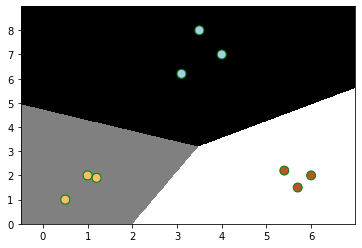

In [3]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt

def plot_classifier(classifier, X, y):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='green', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

if __name__=='__main__':
    # input data
    X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
    y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

    # initialize the logistic regression classifier
    classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

    # train the classifier
    classifier.fit(X, y)

    # draw datapoints and boundaries
    plot_classifier(classifier, X, y)